In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
%matplotlib inline

# 닉네임, 토큰 설정
# os.environ["KAGGLE_USERNAME"] = ''
# os.environ["KAGGLE_KEY"] = ""

# 데이터 받기, colab에서 리눅스 명령어를 사용할때는 앞에 !가 붙습니다.
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 3.48MB/s]


In [2]:
!unzip -o titanic.zip
!rm titanic.zip
!ls -al

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
total 4316
drwxr-xr-x 12 jovyan users     384 Jun  6 12:46  .
drwsrwsr-x  1 jovyan users    4096 Jun  4 18:20  ..
-rw-r--r--  1 jovyan users   36025 Jun  5 06:04 'Accuracy 100%.ipynb'
-rw-r--r--  1 jovyan users    3258 Dec 11  2019  gender_submission.csv
drwxr-xr-x  6 jovyan users     192 Jun  5 06:07  .ipynb_checkpoints
-rw-r--r--  1 jovyan users 1014780 Jun  6 12:45 'Random Forest.ipynb'
-rw-r--r--  1 jovyan users    1523 Jun  5 06:04  result.csv
-rw-r--r--  1 jovyan users    2839 Jun  6 12:15  submission.csv
-rw-r--r--  1 jovyan users   28629 Dec 11  2019  test.csv
-rw-r--r--  1 jovyan users 1275563 May 21 07:18  Titanic.ipynb
-rw-r--r--  1 jovyan users 1976319 Jun  6 12:05 'Titanic Preprocessing and Decision Tree.ipynb'
-rw-r--r--  1 jovyan users   61194 Dec 11  2019  train.csv


In [3]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.loc[df['Age'].isnull(), 'Age'] = math.floor(df['Age'].mean())

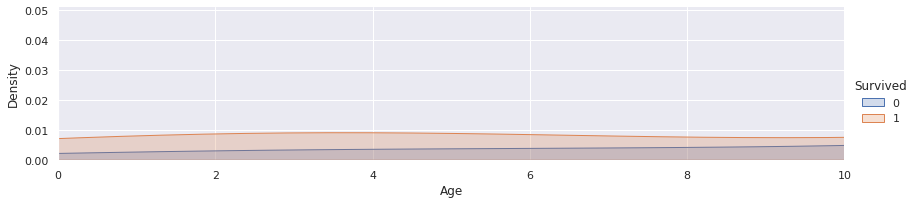

In [56]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.xlim(0,10)
plt.show()

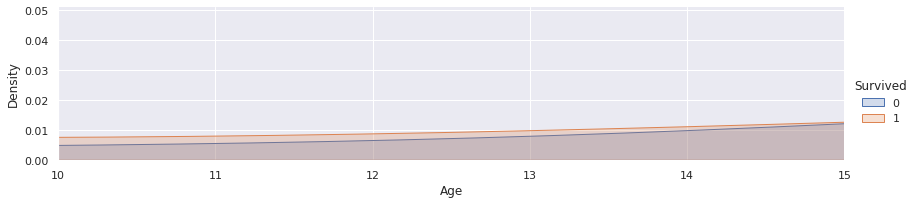

In [57]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.xlim(10,15)
plt.show()

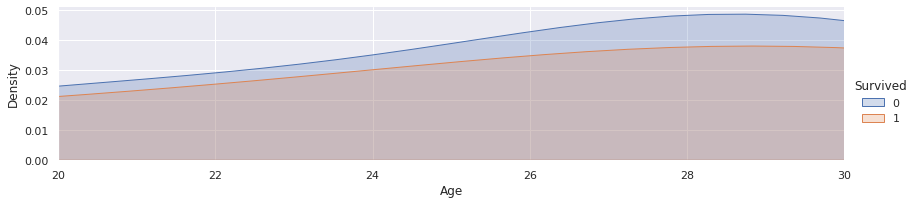

In [58]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.xlim(20,30)
plt.show()

In [5]:
df.loc[ df['Age'] <= 10, 'Age_clean'] = 0
df.loc[(df['Age'] > 10) & (df['Age'] <= 16), 'Age_clean'] = 1
df.loc[(df['Age'] > 16) & (df['Age'] <= 20), 'Age_clean'] = 2
df.loc[(df['Age'] > 20) & (df['Age'] <= 26), 'Age_clean'] = 3
df.loc[(df['Age'] > 26) & (df['Age'] <= 30), 'Age_clean'] = 4
df.loc[(df['Age'] > 30) & (df['Age'] <= 36), 'Age_clean'] = 5
df.loc[(df['Age'] > 36) & (df['Age'] <= 40), 'Age_clean'] = 6
df.loc[(df['Age'] > 40) & (df['Age'] <= 46), 'Age_clean'] = 7
df.loc[(df['Age'] > 46) & (df['Age'] <= 50), 'Age_clean'] = 8
df.loc[(df['Age'] > 50) & (df['Age'] <= 60), 'Age_clean'] = 9
df.loc[ df['Age'] > 60, 'Age_clean'] = 10

<AxesSubplot:>

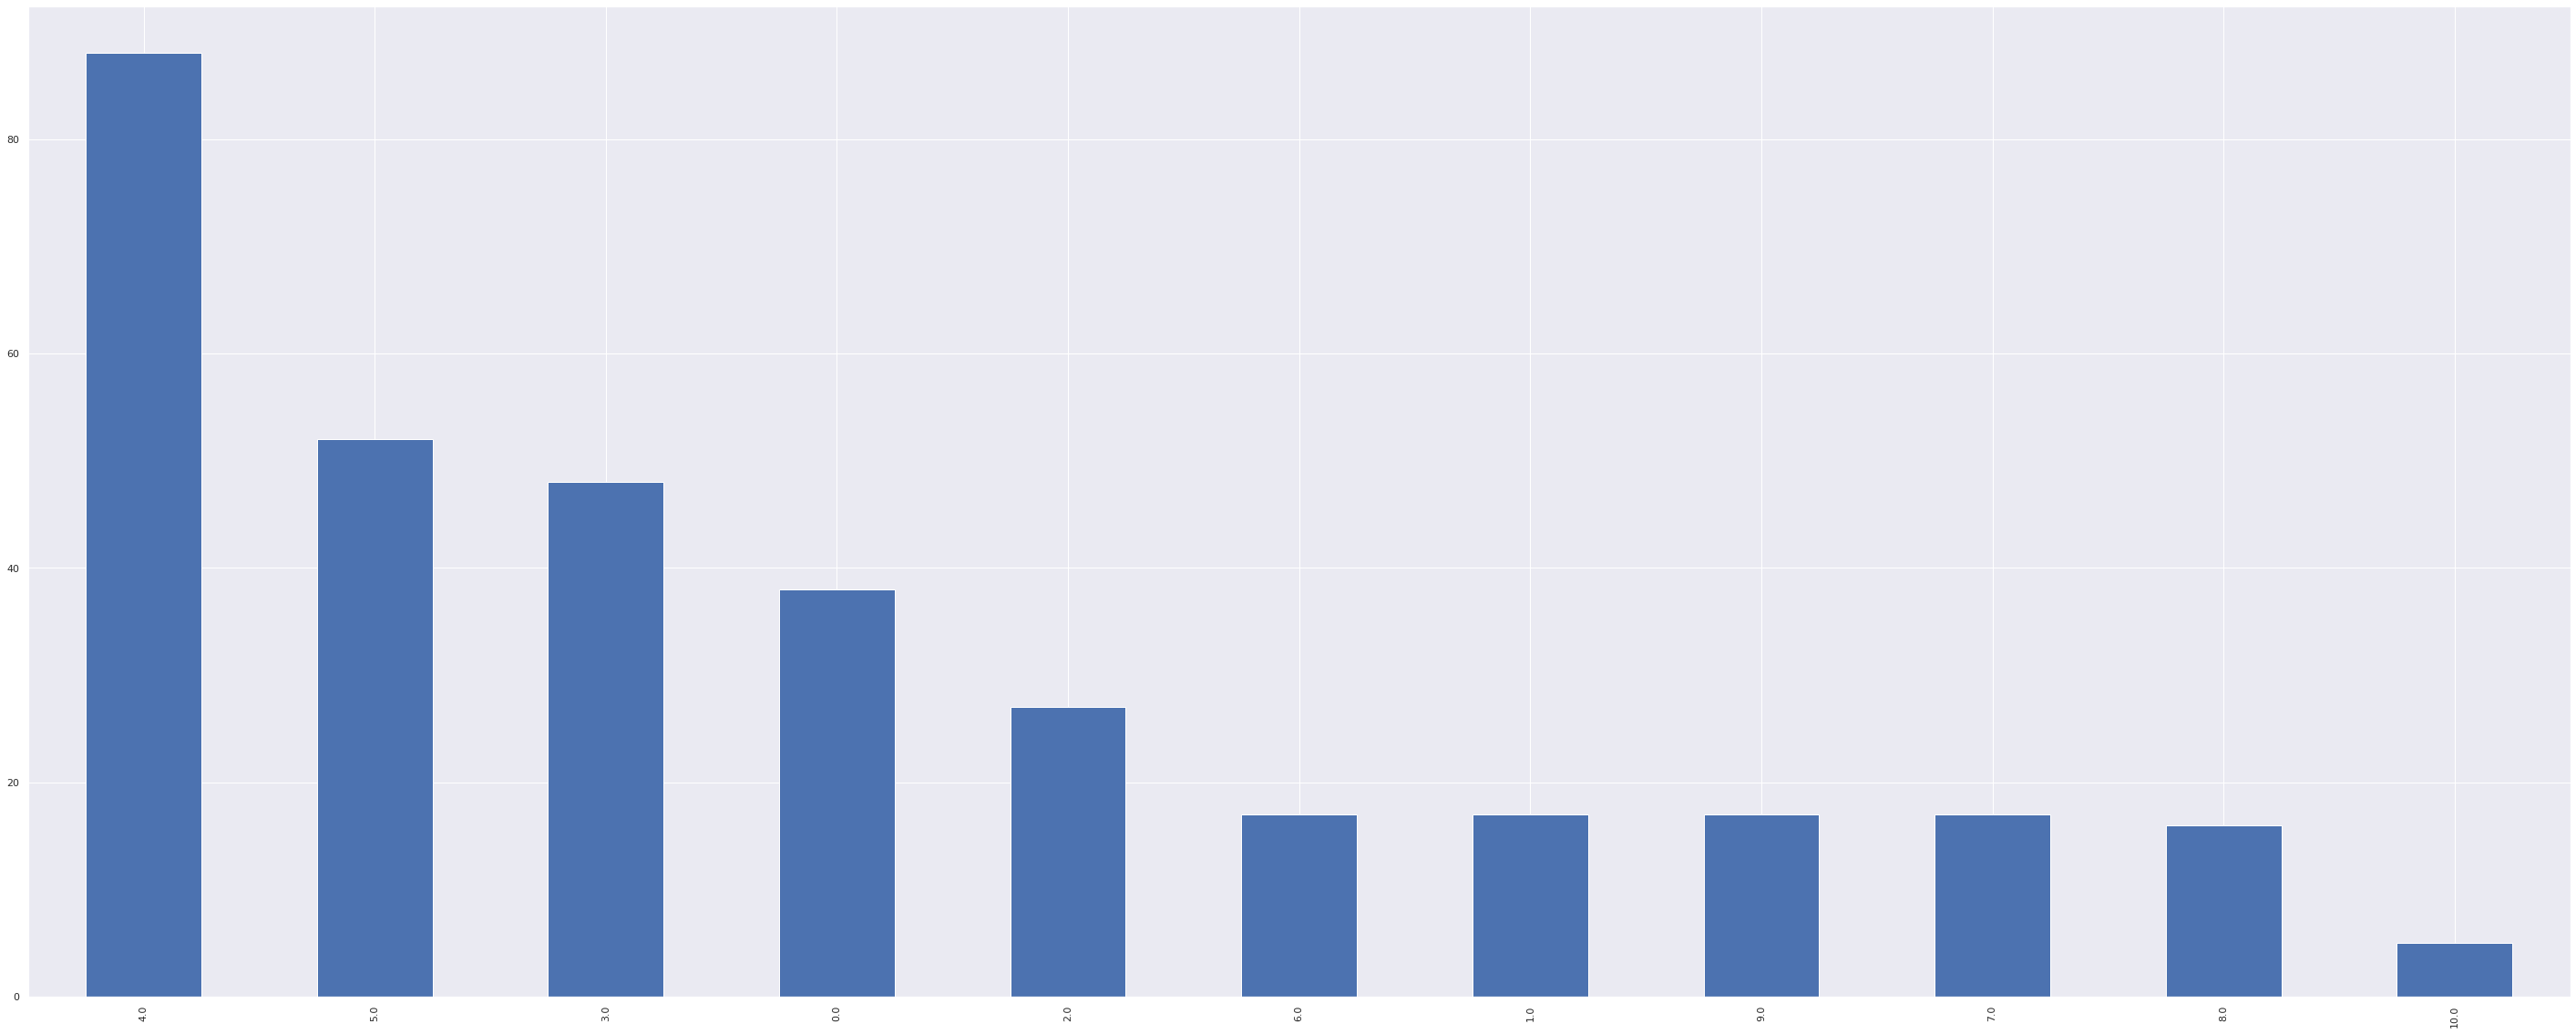

In [55]:
df[df['Survived'] == 1]['Age_clean'].value_counts().plot(kind='bar', stacked=True)

<AxesSubplot:>

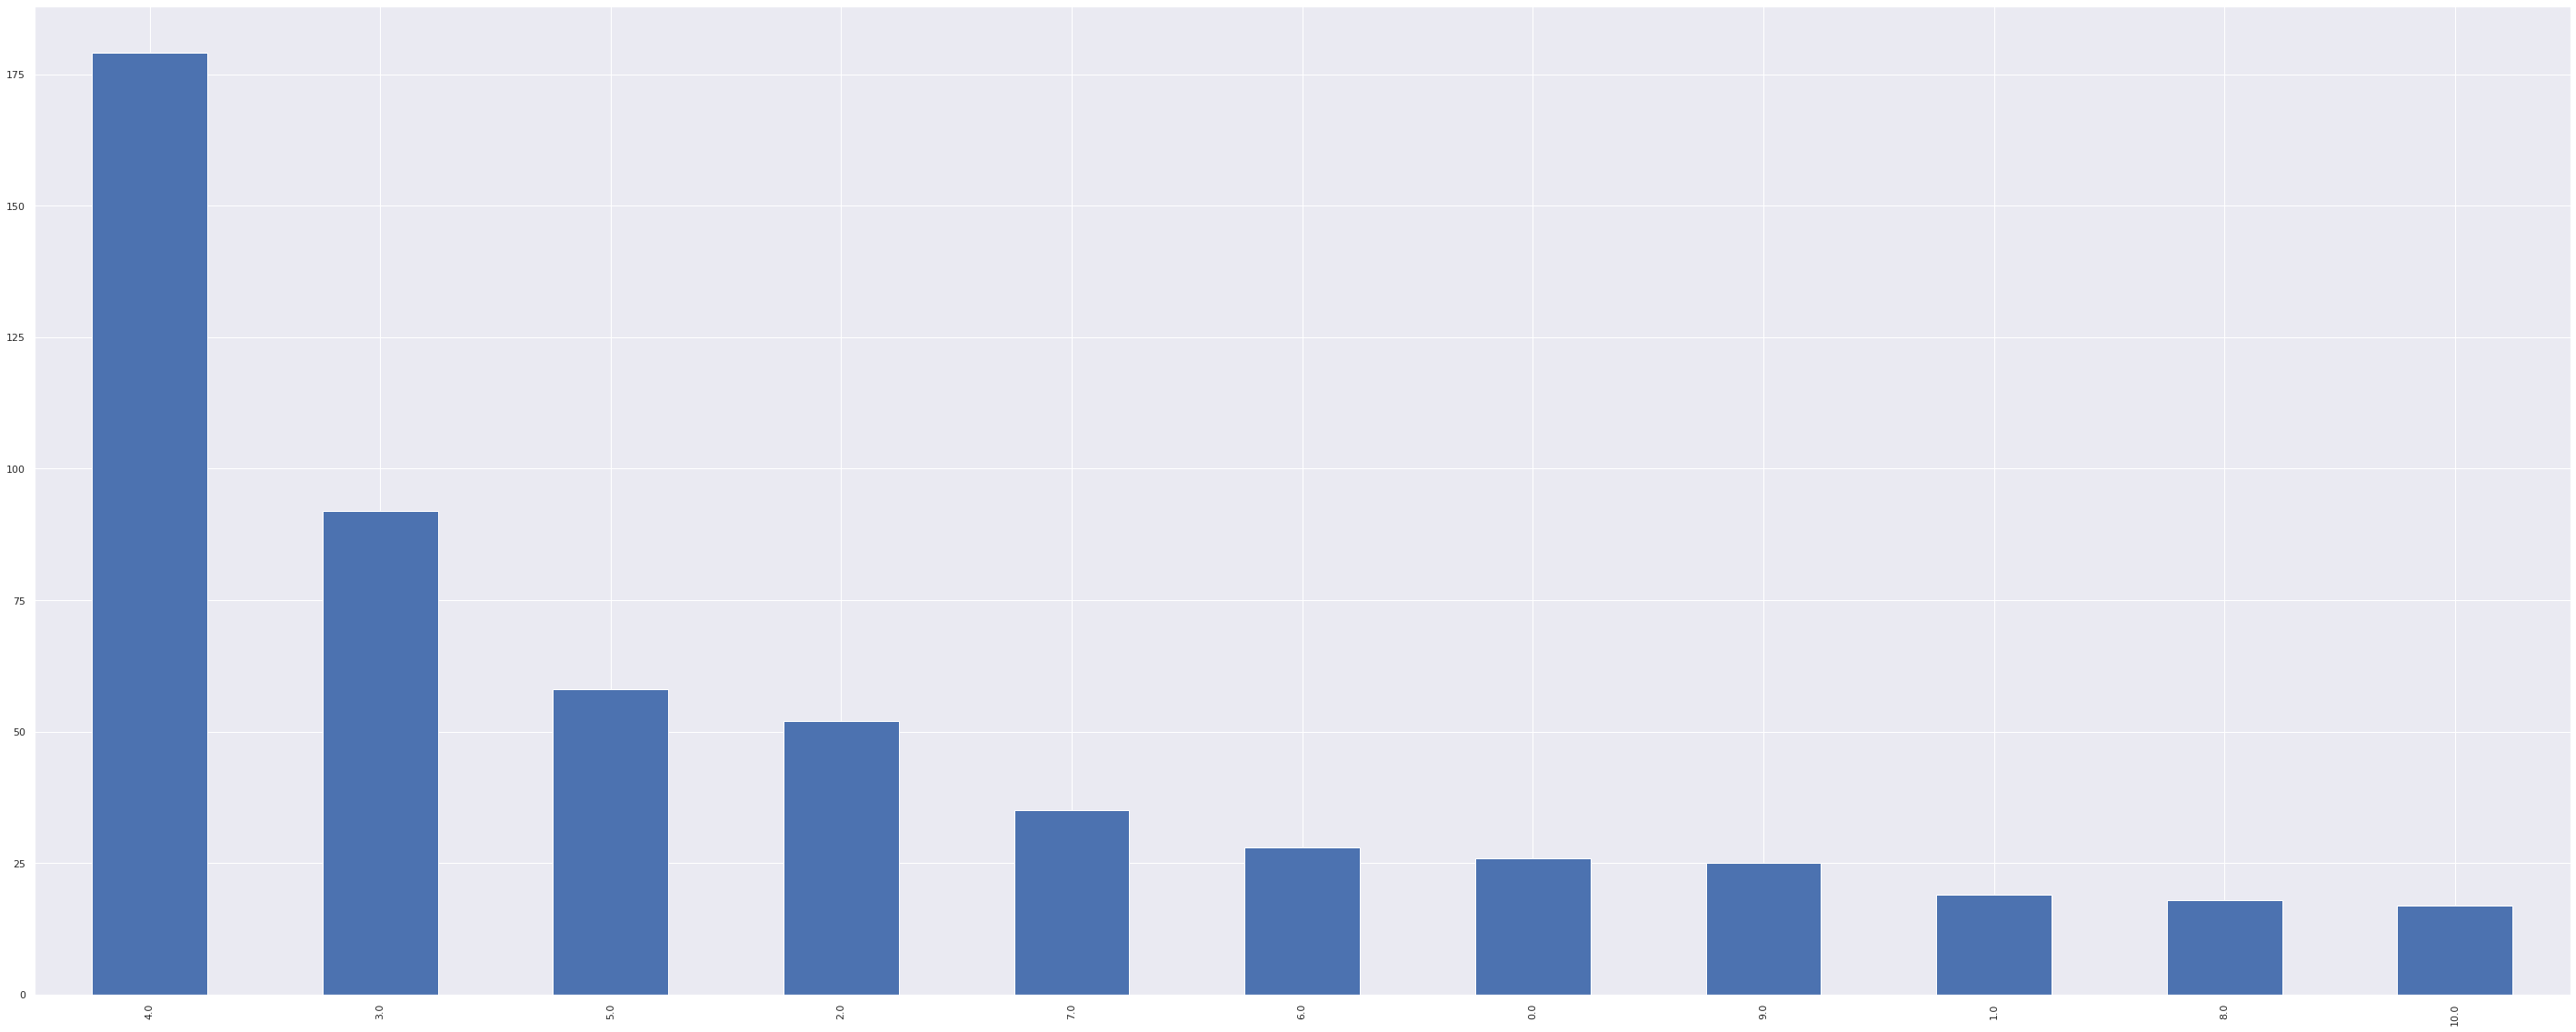

In [54]:
df[df['Survived'] == 0]['Age_clean'].value_counts().plot(kind='bar', stacked=True)

In [6]:
df['FareBin'] = pd.qcut(df['Fare'], 5)

In [7]:
df['FareBin'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: FareBin, dtype: int64

In [8]:
df['Fare_clean'] = df['FareBin'].astype('category').cat.codes

In [9]:
df['Fare_clean'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare_clean, dtype: int64

In [10]:
df['Family'] = 1 + df['SibSp'] + df['Parch']

In [11]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = df['Embarked'].mode()[0]

In [12]:
df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search('Z' if pd.isna(x) else x).group())

In [13]:
df['Fare_remainder_by_10'] = df['Fare'] - (df['Fare'] % 10)
df['Age_remainder_by_10'] = df['Age'] - (df['Age'] % 10)

In [14]:
def getNameTitle(name):
    reCom = re.compile("(M(?:is)?s|(?:Mrs?))|M(?:aster)").search(name)
    if reCom is not None:
        return reCom.group()
    return 'Others'

In [15]:
df['Title'] = df['Name'].replace('Mlle', 'Miss')
df['Title'] = df['Name'].replace('Ms', 'Miss')
df['Title'] = df['Name'].replace('Mme', 'Mrs')

In [16]:
df['Name_title'] = df['Title'].map(lambda x: getNameTitle(x))

In [17]:
df['Name_title'].value_counts()

Mr        518
Miss      182
Mrs       127
Master     40
Others     23
Ms          1
Name: Name_title, dtype: int64

In [18]:
df['Fare_per_person'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)

In [19]:
df['Fare_per_person_remainder_by_10'] = df['Fare_per_person'] - (df['Fare_per_person'] % 10)

In [20]:
df['is_alone'] = 1
df.loc[df['SibSp'] + df['Parch'] > 0, 'is_alone'] = 0

In [21]:
df['is_pclass_3_from_queenstown'] = 0
df.loc[(df['Pclass'] == 3) & (df['Embarked'] == 'Q'), 'is_pclass_3_from_queenstown'] = 1

In [22]:
df['is_pclass_3_from_southampton'] = 0
df.loc[(df['Pclass'] == 3) & (df['Embarked'] == 'S'), 'is_pclass_3_from_southampton'] = 1

In [23]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [24]:
deckDummies = pd.get_dummies(df['Deck'], prefix='Deck')
sexDummies = pd.get_dummies(df['Sex'])
embarkedDummies = pd.get_dummies(df['Embarked'])
nameTitleDummies = pd.get_dummies(df['Name_title'])

In [25]:
df = pd.concat([df, deckDummies, sexDummies, embarkedDummies, nameTitleDummies], axis=1)
df = df.drop(['Sex', 'Embarked'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,FareBin,Fare_clean,...,male,C,Q,S,Master,Miss,Mr,Mrs,Ms,Others
0,1,0,3,22.0,1,0,7.2500,3.0,"(-0.001, 7.854]",0,...,1,0,0,1,0,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,6.0,"(39.688, 512.329]",4,...,0,1,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,3.0,"(7.854, 10.5]",1,...,0,0,0,1,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,5.0,"(39.688, 512.329]",4,...,0,0,0,1,0,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,5.0,"(7.854, 10.5]",1,...,1,0,0,1,0,0,1,0,0,0


In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Age_clean', 'FareBin', 'Fare_clean', 'Family', 'Deck',
       'Fare_remainder_by_10', 'Age_remainder_by_10', 'Title', 'Name_title',
       'Fare_per_person', 'Fare_per_person_remainder_by_10', 'is_alone',
       'is_pclass_3_from_queenstown', 'is_pclass_3_from_southampton', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_Z', 'female', 'male', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr',
       'Mrs', 'Ms', 'Others'],
      dtype='object')

In [27]:
cols = ['Pclass', 'Fare',
        'Fare_clean', 'Fare_remainder_by_10','Fare_per_person',
       'Fare_per_person_remainder_by_10', 'is_alone', 
       'is_pclass_3_from_southampton', 
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 
       'Deck_Z', 'female', 'male', 'C', 'S', 'Miss', 'Mr',
       'Mrs']
# cols = ['female', 'male']

In [28]:
dfCorr = df[cols].corr()
dfCorr

,Pclass,Fare,Fare_clean,Fare_remainder_by_10,Fare_per_person,Fare_per_person_remainder_by_10,is_alone,is_pclass_3_from_southampton,Deck_B,Deck_C,Deck_D,Deck_E,Deck_Z,female,male,C,S,Miss,Mr,Mrs
Pclass,1.000000,-0.549500,-0.705206,-0.564862,-0.485079,-0.505305,0.135207,0.670193,-0.369572,-0.417048,-0.278690,-0.230091,0.725541,-0.131900,0.131900,-0.243292,0.074053,-0.000576,0.139188,-0.158279
Fare,-0.549500,1.000000,0.600883,0.998423,0.840995,0.842270,-0.271832,-0.286397,0.386297,0.364318,0.098878,0.053717,-0.482075,0.182333,-0.182333,0.269335,-0.162184,0.118271,-0.182702,0.106104
Fare_clean,-0.705206,0.600883,1.000000,0.610463,0.445210,0.456207,-0.520277,-0.394141,0.271552,0.330665,0.211558,0.163513,-0.532913,0.244943,-0.244943,0.204579,-0.026202,0.059106,-0.309000,0.250539
Fare_remainder_by_10,-0.564862,0.998423,0.610463,1.000000,0.837877,0.842106,-0.277473,-0.302328,0.388403,0.367206,0.100812,0.055142,-0.489091,0.185802,-0.185802,0.265629,-0.154973,0.119260,-0.187728,0.110161
Fare_per_person,-0.485079,0.840995,0.445210,0.837877,1.000000,0.997379,0.045603,-0.262183,0.325852,0.240548,0.079210,0.049898,-0.373966,0.115143,-0.115143,0.271215,-0.177159,0.112059,-0.083972,0.013375
Fare_per_person_remainder_by_10,-0.505305,0.842270,0.456207,0.842106,0.997379,1.000000,0.037494,-0.284974,0.330748,0.243793,0.076087,0.049599,-0.378898,0.116312,-0.116312,0.268255,-0.169902,0.111319,-0.088531,0.016439
is_alone,0.135207,-0.271832,-0.520277,-0.277473,0.045603,0.037494,1.000000,0.090266,-0.064914,-0.125062,-0.083664,-0.028179,0.158029,-0.303646,0.303646,-0.095298,0.029074,-0.055127,0.394266,-0.364387
is_pclass_3_from_southampton,0.670193,-0.286397,-0.394141,-0.302328,-0.262183,-0.284974,0.090266,1.000000,-0.191150,-0.215705,-0.158858,-0.119346,0.386786,-0.174851,0.174851,-0.390465,0.498842,-0.080284,0.185016,-0.133345
Deck_B,-0.369572,0.386297,0.271552,0.388403,0.325852,0.330748,-0.064914,-0.191150,1.000000,-0.062841,-0.046280,-0.045547,-0.433053,0.109689,-0.109689,0.168642,-0.102063,0.054791,-0.115253,0.047405
Deck_C,-0.417048,0.364318,0.330665,0.367206,0.240548,0.243793,-0.125062,-0.215705,-0.062841,1.000000,-0.052225,-0.051398,-0.488683,0.058649,-0.058649,0.113952,-0.068502,-0.000578,-0.048497,0.085084


<AxesSubplot:>

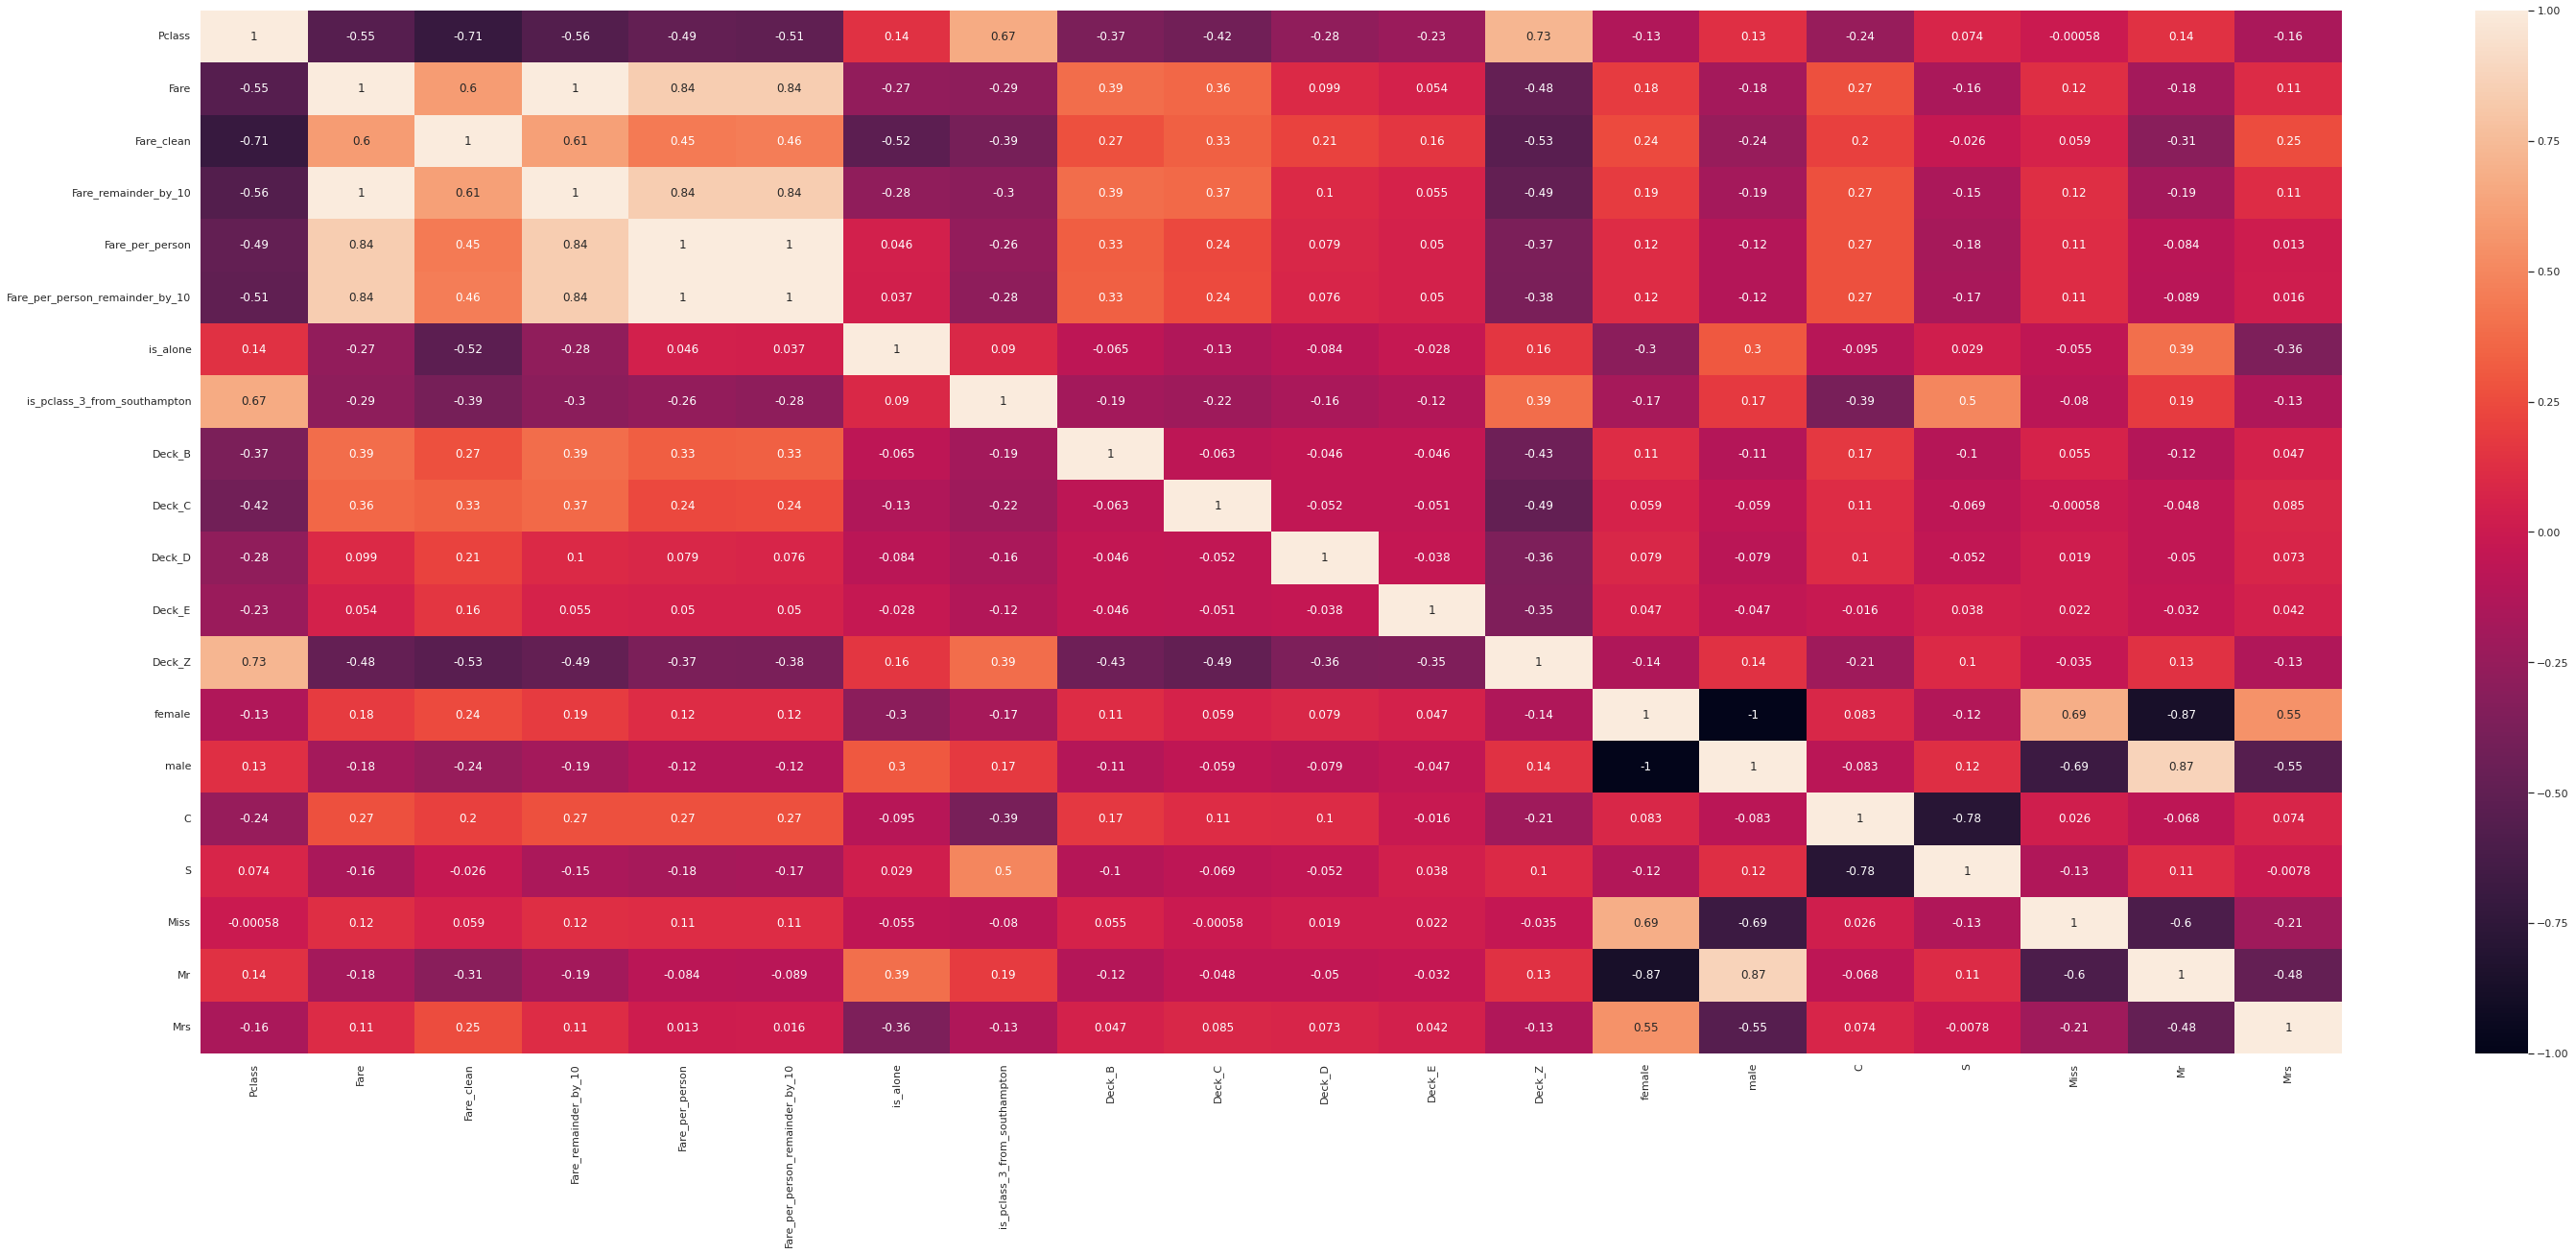

In [29]:
sns.set(rc = {'figure.figsize':(50,20)})
sns.heatmap(dfCorr, annot=True)

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
train_input, test_input, train_target, test_target = train_test_split(df[cols], df['Survived'], test_size=0.2, random_state=42)

In [32]:
train_input.head()

,Pclass,Fare,Fare_clean,Fare_remainder_by_10,Fare_per_person,Fare_per_person_remainder_by_10,is_alone,is_pclass_3_from_southampton,Deck_B,Deck_C,Deck_D,Deck_E,Deck_Z,female,male,C,S,Miss,Mr,Mrs
331,1,28.5000,3,20.0,28.500000,20.0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
733,2,13.0000,2,10.0,13.000000,10.0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
382,3,7.9250,1,0.0,7.925000,0.0,1,1,0,0,0,0,1,0,1,0,1,0,1,0
704,3,7.8542,0,0.0,3.927100,0.0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
813,3,31.2750,3,30.0,4.467857,0.0,0,1,0,0,0,0,1,1,0,0,1,1,0,0


In [74]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_depth=8, min_samples_split=20, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1, cv=5)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9424172910307403 0.8146557667684429


In [75]:
scores

{'fit_time': array([0.50203872, 0.46705055, 0.72960734, 0.65037775, 0.70939112]),
 'score_time': array([0.04070687, 0.04150987, 0.05345297, 0.07538891, 0.05754709]),
 'test_score': array([0.8041958 , 0.79020979, 0.81690141, 0.81690141, 0.84507042]),
 'train_score': array([0.94551845, 0.94376098, 0.94385965, 0.93859649, 0.94035088])}

In [76]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.04116128 0.15303583 0.03584874 0.0439267  0.16913737 0.04179918
 0.01526161 0.04668101 0.0064864  0.00751064 0.00720614 0.01169819
 0.02375749 0.09437059 0.10154342 0.01578098 0.01405246 0.02405275
 0.11126668 0.03542254]


In [77]:
rf.feature_importances_

array([0.04116128, 0.15303583, 0.03584874, 0.0439267 , 0.16913737,
       0.04179918, 0.01526161, 0.04668101, 0.0064864 , 0.00751064,
       0.00720614, 0.01169819, 0.02375749, 0.09437059, 0.10154342,
       0.01578098, 0.01405246, 0.02405275, 0.11126668, 0.03542254])

In [78]:
predicted = rf.predict(test_input)
accuracy = accuracy_score(test_target, predicted)

accuracy

0.8212290502793296

In [79]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
df_test.loc[df_test['Age'].isnull(), 'Age'] = math.floor(df_test['Age'].mean())
df_test.loc[df_test['Embarked'].isnull(), 'Embarked'] = df_test['Embarked'].mode()[0]
df_test['Deck'] = df_test['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search('Z' if pd.isna(x) else x).group())

df_test.loc[df_test['Fare'].isnull(), 'Fare'] = math.floor(df_test['Fare'].mean())
df_test['Fare_remainder_by_10'] = df_test['Fare'] - (df_test['Fare'] % 10)
df_test['Age_remainder_by_10'] = df_test['Age'] - (df_test['Age'] % 10)

df_test['FareBin'] = pd.qcut(df_test['Fare'], 5)
df_test['Fare_clean'] = df_test['FareBin'].astype('category').cat.codes

df_test['Family'] = 1 + df_test['SibSp'] + df_test['Parch']

df_test['Title'] = df_test['Name'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Name'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Name'].replace('Mme', 'Mrs')
df_test['Name_title'] = df_test['Title'].map(lambda x: getNameTitle(x))

df_test['Fare_per_person'] = df_test['Fare'] / (df_test['SibSp'] + df_test['Parch'] + 1)
df_test['Fare_per_person_remainder_by_10'] = df_test['Fare_per_person'] - (df_test['Fare_per_person'] % 10)
df_test['is_alone'] = 1
df_test.loc[df_test['SibSp'] + df_test['Parch'] > 0, 'is_alone'] = 0
df_test['is_pclass_3_from_queenstown'] = 0
df_test.loc[(df_test['Pclass'] == 3) & (df_test['Embarked'] == 'Q'), 'is_pclass_3_from_queenstown'] = 1
df_test['is_pclass_3_from_southampton'] = 0
df_test.loc[(df_test['Pclass'] == 3) & (df_test['Embarked'] == 'S'), 'is_pclass_3_from_southampton'] = 1
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
deckDummies = pd.get_dummies(df_test['Deck'], prefix='Deck')
sexDummies = pd.get_dummies(df_test['Sex'])
embarkedDummies = pd.get_dummies(df_test['Embarked'])
nameTitleDummies = pd.get_dummies(df_test['Name_title'])
df_test = pd.concat([df_test, deckDummies, sexDummies, embarkedDummies, nameTitleDummies], axis=1)
df_test = df_test.drop(['Sex', 'Embarked'], axis=1)

In [81]:
df_test.loc[ df_test['Age'] <= 10, 'Age_clean'] = 0
df_test.loc[(df_test['Age'] > 10) & (df_test['Age'] <= 16), 'Age_clean'] = 1
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 20), 'Age_clean'] = 2
df_test.loc[(df_test['Age'] > 20) & (df_test['Age'] <= 26), 'Age_clean'] = 3
df_test.loc[(df_test['Age'] > 26) & (df_test['Age'] <= 30), 'Age_clean'] = 4
df_test.loc[(df_test['Age'] > 30) & (df_test['Age'] <= 36), 'Age_clean'] = 5
df_test.loc[(df_test['Age'] > 36) & (df_test['Age'] <= 40), 'Age_clean'] = 6
df_test.loc[(df_test['Age'] > 40) & (df_test['Age'] <= 46), 'Age_clean'] = 7
df_test.loc[(df_test['Age'] > 46) & (df_test['Age'] <= 50), 'Age_clean'] = 8
df_test.loc[(df_test['Age'] > 50) & (df_test['Age'] <= 60), 'Age_clean'] = 9
df_test.loc[ df_test['Age'] > 60, 'Age_clean'] = 10

In [82]:
predicted = rf.predict(df_test[cols])
predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [83]:
predictResult = pd.DataFrame(predicted, columns = ['Survived'])
predictResult.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [84]:
predictDf = pd.concat([df_test['PassengerId'], predictResult['Survived']], axis=1)
predictDf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [85]:
predictDf.to_csv('./submission.csv', sep=',', index = False)

In [86]:
!kaggle competitions submit -c titanic -f submission.csv -m "Random foreset"

100%|████████████████████████████████████████| 2.77k/2.77k [00:08<00:00, 338B/s]
400 - Bad Request


In [87]:
!kaggle competitions submissions -c titanic

fileName               date                 description             status    publicScore  privateScore  
---------------------  -------------------  ----------------------  --------  -----------  ------------  
submission.csv         2022-06-06 13:08:15  Random foreset          complete  0.77272                    
submission.csv         2022-06-06 12:46:21  Random foreset          complete  0.78468                    
submission.csv         2022-06-06 12:15:56  Random foreset          complete  0.77511                    
submission.csv         2022-06-06 12:13:18  Random foreset          complete  0.78229                    
submission.csv         2022-06-06 12:04:01  Random foreset          complete  0.78229                    
submission.csv         2022-06-06 12:03:24  Decision tree           complete  0.75358                    
submission.csv         2022-06-06 12:01:54  Decision tree           complete  0.76555                    
submission.csv         2022-06-06 11:58:17  Ra